<a href="https://colab.research.google.com/github/Guru-180188/Projects/blob/main/Urban_Sound_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/ .kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [60]:
!kaggle datasets download -d chrisfilo/urbansound8k

100% 5.61G/5.61G [01:09<00:00, 92.9MB/s]
100% 5.61G/5.61G [01:09<00:00, 87.3MB/s]


In [61]:
import zipfile
zip_ref = zipfile.ZipFile('/content/urbansound8k.zip', 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
filename='/content/data/fold1/101415-3-0-2.wav'

In [64]:
import IPython.display as ipd # uesd to create graphs in sound wave form
import librosa
import librosa.display

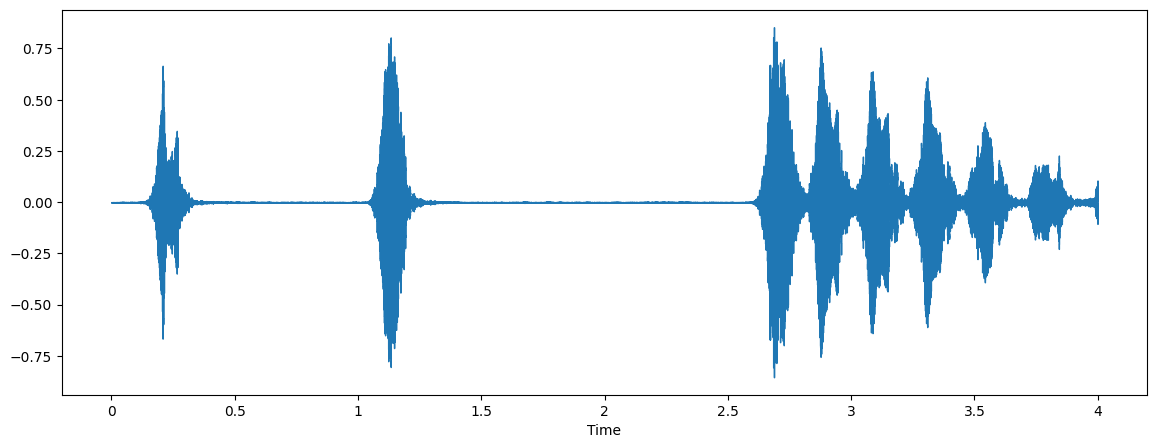

In [65]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [66]:
filename='/content/data/fold1/101415-3-0-2.wav'
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [67]:
import pandas as pd
metadata=pd.read_csv("/content/data/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [68]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [69]:
import librosa
audio_file_path='/content/data/fold2/100652-3-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [70]:
print(librosa_audio_data)

[-0.00212092 -0.0020752  -0.00092536 ...  0.01441212  0.01405826
  0.01307626]


In [101]:
librosa_sample_rate

22050

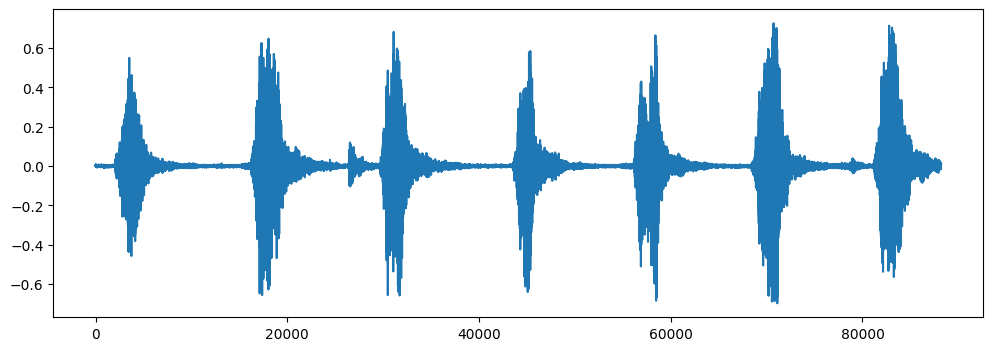

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [72]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [98]:
wave_sample_rate

44100

In [100]:
wave_audio

array([[-135,  -35],
       [-138,  -37],
       [-112,  -21],
       ...,
       [ 253,  638],
       [ 214,  609],
       [ 180,  553]], dtype=int16)

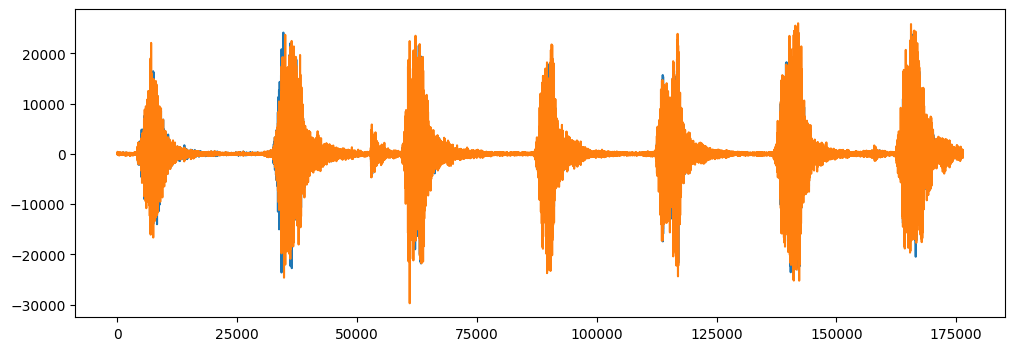

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [74]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [75]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/data'
metadata=pd.read_csv('/content/data/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [76]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [77]:
import numpy as np
from tqdm import tqdm
#Now we iterate through every audio file and extract features
#using Mel-Frequency Cepstral Coefficients
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]) + '/', row["slice_file_name"])
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3552it [02:23, 30.51it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [05:27, 32.78it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:39, 25.68it/s]


In [78]:
#converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.58121, -122.813156, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995583, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.57807, 43.195866, ...",children_playing
3,"[-406.47922, 91.1966, -25.043552, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658783, 50.690285,...",children_playing


In [79]:
#Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [97]:
X

array([[-2.11936981e+02,  6.25812111e+01, -1.22813156e+02, ...,
        -7.91079581e-01, -1.54006326e+00,  1.32115364e+00],
       [-4.17005188e+02,  9.93366241e+01, -4.29955826e+01, ...,
         1.70679843e+00, -1.79360628e+00,  1.76138484e+00],
       [-4.52393158e+02,  1.12362534e+02, -3.75780716e+01, ...,
         3.80801344e+00, -9.00559202e-02,  8.69102240e-01],
       ...,
       [-2.97315338e+02,  1.02090256e+02, -3.67510796e+01, ...,
        -1.62244570e+00,  1.25214458e+00,  9.13216591e+00],
       [-3.36923859e+02,  1.15313904e+02, -4.48470917e+01, ...,
        -6.76911306e+00, -2.85838604e+00,  6.95349121e+00],
       [-3.07417603e+02,  8.33067245e+01, -2.57565117e+01, ...,
         8.39591086e-01, -1.17747602e+01, -5.59599781e+00]], dtype=float32)

In [96]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
#Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [95]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [91]:
X_train

array([[-1.24484680e+02,  1.03169846e+02, -1.33165455e+01, ...,
         4.72908735e+00, -2.91925478e+00,  4.36318588e+00],
       [-5.13921928e+00,  7.90478210e+01,  4.16248989e+00, ...,
        -3.44017529e+00, -5.19278288e+00, -1.54999769e+00],
       [-4.03939590e+01, -1.31092958e+01, -7.20987606e+00, ...,
         1.99475348e+00, -8.70601475e-01,  2.89561892e+00],
       ...,
       [-4.26655701e+02,  9.15513382e+01,  4.19170284e+00, ...,
         9.74399447e-01,  5.15445232e-01,  9.15374696e-01],
       [-1.37251968e+02,  1.24268539e+02, -2.15997734e+01, ...,
         1.25008607e+00, -1.89575112e+00, -9.01497364e-01],
       [-4.18389374e+02,  2.06862305e+02,  7.23461866e+00, ...,
        -3.98612142e+00, -4.71784592e+00, -2.78925627e-01]], dtype=float32)

In [92]:
X_test

array([[-2.6085992e+02,  9.4212570e+01,  2.7129782e+01, ...,
        -1.6656373e-01, -2.0915849e+00, -1.6249146e+00],
       [-4.6372934e+02, -2.4342041e+00, -3.0510252e+01, ...,
         1.8017397e+01,  1.3511432e+01, -4.8382807e+00],
       [-8.5884254e+01,  3.3210907e+01, -3.1857859e+01, ...,
         5.0261493e+00, -1.5080178e+00, -9.4783574e-01],
       ...,
       [-1.2369573e+02,  1.3222084e+02, -2.6659418e+01, ...,
        -7.4895277e+00,  2.8749330e+00,  1.3896350e+01],
       [-2.0021922e+02,  9.0722588e+01, -2.2294386e+01, ...,
         1.7806649e+00, -1.0290449e+00,  2.6773803e+00],
       [-2.8755594e+02,  1.5077345e+02,  6.3761840e+00, ...,
        -2.6784778e-01, -2.1263294e+00, -1.5780768e+00]], dtype=float32)

In [93]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [94]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [83]:
#No of classes
num_labels=y.shape[1]

In [84]:
model=Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [86]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [87]:
#Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 10.4591 - accuracy: 0.1231
Epoch 1: val_loss improved from inf to 2.29273, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 6ms/step - loss: 10.1599 - accuracy: 0.1215 - val_loss: 2.2927 - val_accuracy: 0.1099
Epoch 2/100
 30/219 [===>..........................] - ETA: 0s - loss: 2.8707 - accuracy: 0.1240

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


208/219 [===========================>..] - ETA: 0s - loss: 2.6088 - accuracy: 0.1203
Epoch 2: val_loss improved from 2.29273 to 2.28435, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5966 - accuracy: 0.1211 - val_loss: 2.2844 - val_accuracy: 0.1070
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 2.3482 - accuracy: 0.1179
Epoch 3: val_loss improved from 2.28435 to 2.27698, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3484 - accuracy: 0.1185 - val_loss: 2.2770 - val_accuracy: 0.1070
Epoch 4/100
219/219 [==============================] - ETA: 0s - loss: 2.2962 - accuracy: 0.1246
Epoch 4: val_loss improved from 2.27698 to 2.27276, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.2962 - accuracy: 0.1246 - val_loss: 2.2728 - val_accuracy: 0.1076
Epoch 5

In [88]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7550085783004761


In [89]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [90]:
filename="/content/data/fold9/101729-0-0-11.wav"
audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features),axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-2.2271716e+02  2.6865116e+01  3.7549767e+01  2.5503342e+01
 -6.2443805e+00  1.7362698e+01  5.7781487e+00  2.4405198e+00
  2.2836857e+01 -8.7359276e+00  1.4248152e+01 -1.0543524e+00
 -5.8040557e+00  1.1086256e+01 -7.7787790e+00  7.8669643e+00
  5.7673640e+00 -2.7103233e+00  8.6504622e+00 -3.7207496e+00
 -5.5323970e-01  2.8525882e+00 -8.4664993e+00  4.5694003e+00
 -4.3635960e+00  1.5950753e-01  1.6243342e+00  9.3071282e-01
  1.4041353e+00  1.9759493e+00 -4.1829681e+00  2.9112344e+00
 -6.4657426e+00  4.0485630e+00 -4.1146564e+00  2.2151716e+00
 -1.4158154e+00  3.1382654e+00 -2.8796730e+00  2.3029783e+00]
[[-2.2271716e+02  2.6865116e+01  3.7549767e+01  2.5503342e+01
  -6.2443805e+00  1.7362698e+01  5.7781487e+00  2.4405198e+00
   2.2836857e+01 -8.7359276e+00  1.4248152e+01 -1.0543524e+00
  -5.8040557e+00  1.1086256e+01 -7.7787790e+00  7.8669643e+00
   5.7673640e+00 -2.7103233e+00  8.6504622e+00 -3.7207496e+00
  -5.5323970e-01  2.8525882e+00 -8.4664993e+00  4.5694003e+00
  -4.3635960e+00 

array(['air_conditioner'], dtype='<U16')